# Task 1: Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population

# Import Modules

In [6]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
world=pd.read_csv('World_Population_Data.csv')
world

,Series Name,Series Code,Country Name,Country Code,2022,2021,2020,2019,2018,2017,...,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001
0,"Population, total",SP.POP.TOTL,Afghanistan,AFG,4.112877e+07,4.009946e+07,3.897223e+07,3.776950e+07,3.668678e+07,3.564342e+07,...,2.818967e+07,2.738531e+07,2.642720e+07,2.590330e+07,2.544294e+07,2.441119e+07,2.355355e+07,2.264513e+07,2.100026e+07,1.968863e+07
1,"Population, total",SP.POP.TOTL,Albania,ALB,2.775634e+06,2.811666e+06,2.837849e+06,2.854191e+06,2.866376e+06,2.873457e+06,...,2.913021e+06,2.927519e+06,2.947314e+06,2.970017e+06,2.992547e+06,3.011487e+06,3.026939e+06,3.039616e+06,3.051010e+06,3.060173e+06
2,"Population, total",SP.POP.TOTL,Algeria,DZA,4.490322e+07,4.417797e+07,4.345167e+07,4.270537e+07,4.192701e+07,4.113655e+07,...,3.585634e+07,3.519604e+07,3.456959e+07,3.398383e+07,3.343508e+07,3.295669e+07,3.251019e+07,3.205588e+07,3.162470e+07,3.120098e+07
3,"Population, total",SP.POP.TOTL,American Samoa,ASM,4.427300e+04,4.503500e+04,4.618900e+04,4.732100e+04,4.842400e+04,4.946300e+04,...,5.484900e+04,5.536600e+04,5.589100e+04,5.638300e+04,5.683700e+04,5.725400e+04,5.762600e+04,5.794100e+04,5.817700e+04,5.832400e+04
4,"Population, total",SP.POP.TOTL,Andorra,AND,7.982400e+04,7.903400e+04,7.770000e+04,7.634300e+04,7.501300e+04,7.383700e+04,...,7.151900e+04,7.385200e+04,7.605500e+04,7.816800e+04,8.022100e+04,7.982600e+04,7.693300e+04,7.390700e+04,7.084900e+04,6.782000e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,Virgin Islands (U.S.),VIR,4.661338e+01,4.676444e+01,4.691464e+01,4.705731e+01,4.718591e+01,4.731421e+01,...,4.780106e+01,4.783454e+01,4.787006e+01,4.787760e+01,4.787070e+01,4.785267e+01,4.782515e+01,4.778913e+01,4.775493e+01,4.772513e+01
1081,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,West Bank and Gaza,PSE,4.989368e+01,4.987784e+01,4.985896e+01,4.983554e+01,4.981137e+01,4.978597e+01,...,4.987634e+01,4.989868e+01,4.992145e+01,4.994763e+01,4.998332e+01,5.002865e+01,5.008995e+01,5.016754e+01,5.024820e+01,5.032163e+01
1082,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,"Yemen, Rep.",YEM,5.051903e+01,5.053852e+01,5.055432e+01,5.057132e+01,5.059661e+01,5.061696e+01,...,5.059417e+01,5.058269e+01,5.056888e+01,5.055363e+01,5.053901e+01,5.052251e+01,5.050272e+01,5.048167e+01,5.045994e+01,5.043724e+01
1083,"Population, male (% of total population)",SP.POP.TOTL.MA.ZS,Zambia,ZMB,4.934460e+01,4.934495e+01,4.933830e+01,4.932623e+01,4.930909e+01,4.928840e+01,...,4.905638e+01,4.898140e+01,4.888844e+01,4.878478e+01,4.867694e+01,4.857140e+01,4.847690e+01,4.839363e+01,4.831365e+01,4.822997e+01


# Data Understanding

In [14]:
world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Series Name   1085 non-null   object 
 1   Series Code   1085 non-null   object 
 2   Country Name  1085 non-null   object 
 3   Country Code  1085 non-null   object 
 4   2022          1085 non-null   float64
 5   2021          1085 non-null   float64
 6   2020          1085 non-null   float64
 7   2019          1085 non-null   float64
 8   2018          1085 non-null   float64
 9   2017          1085 non-null   float64
 10  2016          1085 non-null   float64
 11  2015          1085 non-null   float64
 12  2014          1085 non-null   float64
 13  2013          1085 non-null   float64
 14  2012          1085 non-null   float64
 15  2011          1085 non-null   float64
 16  2010          1085 non-null   float64
 17  2009          1085 non-null   float64
 18  2008          1085 non-null 

In [15]:
world.shape

(1085, 26)

In [17]:
world.columns

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code', '2022',
       '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013',
       '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004',
       '2003', '2002', '2001'],
      dtype='object')

In [20]:
world.dtypes

Series Name      object
Series Code      object
Country Name     object
Country Code     object
2022            float64
2021            float64
2020            float64
2019            float64
2018            float64
2017            float64
2016            float64
2015            float64
2014            float64
2013            float64
2012            float64
2011            float64
2010            float64
2009            float64
2008            float64
2007            float64
2006            float64
2005            float64
2004            float64
2003            float64
2002            float64
2001            float64
dtype: object

In [22]:
world.dtypes.value_counts()

float64    22
object      4
dtype: int64

# Data Cleaning and Processing

In [24]:
#Check Total no of Duplicate Values
world.duplicated().sum()

0

In [25]:
#Check No of Null and Missing Values
world.isna().sum()

Series Name     0
Series Code     0
Country Name    0
Country Code    0
2022            0
2021            0
2020            0
2019            0
2018            0
2017            0
2016            0
2015            0
2014            0
2013            0
2012            0
2011            0
2010            0
2009            0
2008            0
2007            0
2006            0
2005            0
2004            0
2003            0
2002            0
2001            0
dtype: int64

In [27]:
world['Series Name'].unique()

array(['Population, total', 'Population, female', 'Population, male',
       'Population, female (% of total population)',
       'Population, male (% of total population)'], dtype=object)

In [28]:
world['Series Code'].unique()

array(['SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.MA.IN',
       'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.ZS'], dtype=object)

In [46]:
#Total Distinct Contries
len(world['Country Name'].unique())

217

In [48]:
#Distinct Countries
world['Country Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faroe Islands',

# Data Visualization

In [49]:
age_data = {
    'Age': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    'Frequency': [100, 200, 350, 450, 300, 200, 150, 100, 50, 25]
}

gender_data = {
    'Gender': ['Male', 'Female', 'Other'],
    'Frequency': [400, 450, 50]
}

civil_status_data = {
    'Civil Status': ['Single', 'Married', 'Divorced', 'Widowed'],
    'Frequency': [300, 500, 100, 50]
}

nationality_data = {
    'Nationality': ['USA', 'UK', 'Canada', 'Australia', 'India', 'China'],
    'Frequency': [250, 200, 150, 100, 300, 400]
}

province_population_data = {
    'Province': ['Province A', 'Province B', 'Province C', 'Province D'],
    'Population': [500000, 700000, 400000, 600000]
}

marital_status_data = {
    'Country': ['USA', 'UK', 'Canada', 'Australia', 'India', 'China'],
    'Single': [150, 100, 80, 70, 200, 250],
    'Married': [200, 150, 120, 100, 250, 300],
    'Divorced': [50, 30, 20, 10, 50, 100],
    'Widowed': [20, 20, 10, 0, 20, 50]
}

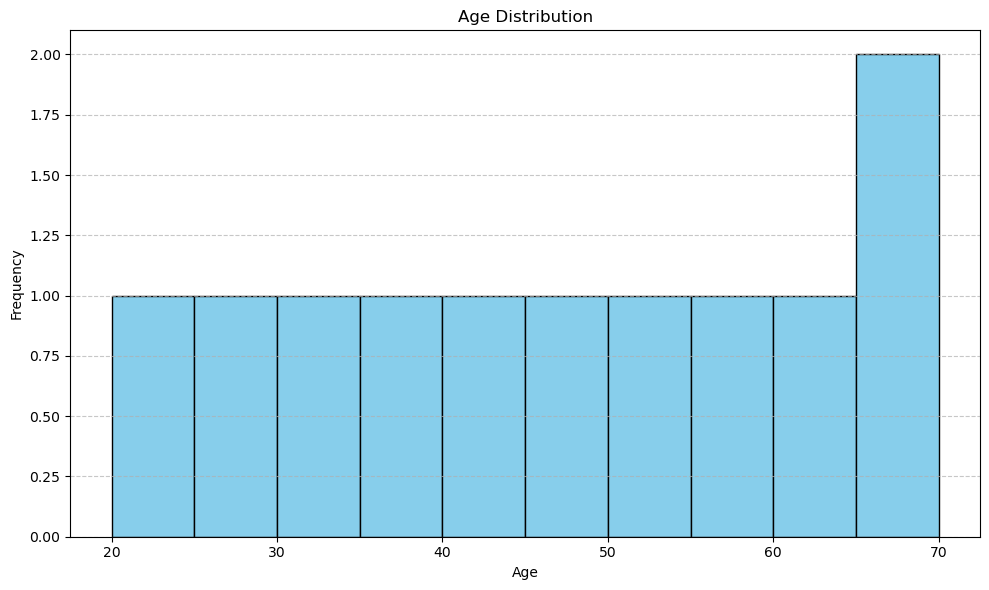

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(age_data['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

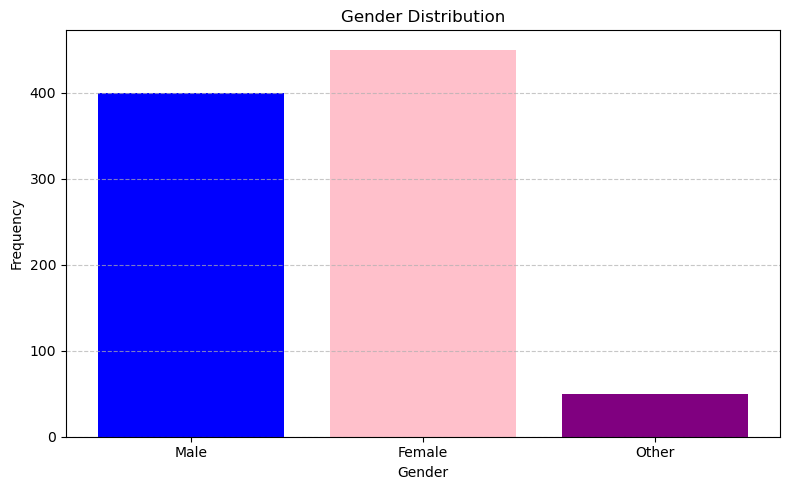

In [51]:
gender_df = pd.DataFrame(gender_data)
plt.figure(figsize=(8, 5))
plt.bar(gender_df['Gender'], gender_df['Frequency'], color=['blue', 'pink', 'purple'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

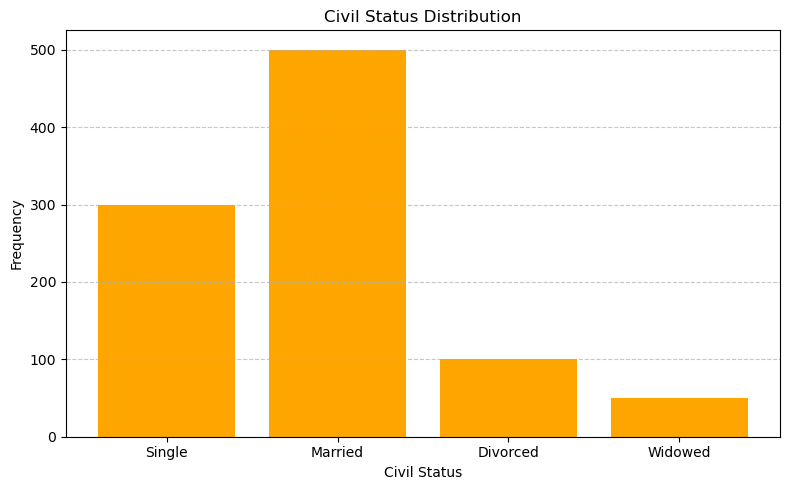

In [52]:
civil_status_df = pd.DataFrame(civil_status_data)
plt.figure(figsize=(8, 5))
plt.bar(civil_status_df['Civil Status'], civil_status_df['Frequency'], color='orange')
plt.title('Civil Status Distribution')
plt.xlabel('Civil Status')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

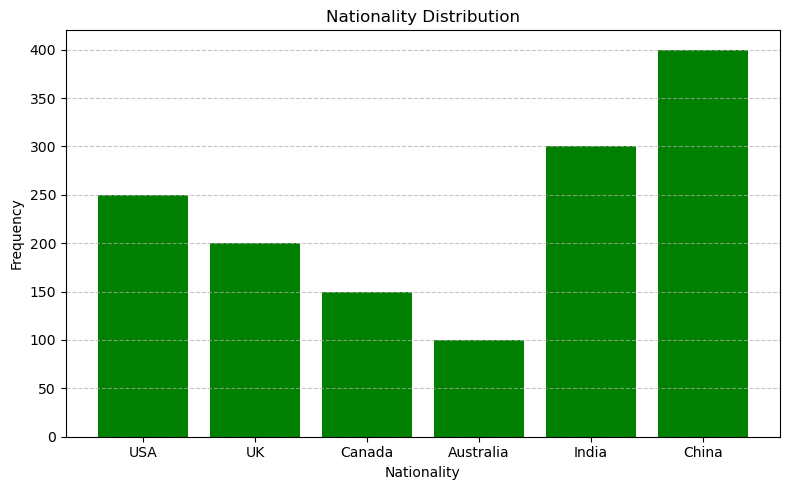

In [53]:
nationality_df = pd.DataFrame(nationality_data)
plt.figure(figsize=(8, 5))
plt.bar(nationality_df['Nationality'], nationality_df['Frequency'], color='green')
plt.title('Nationality Distribution')
plt.xlabel('Nationality')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

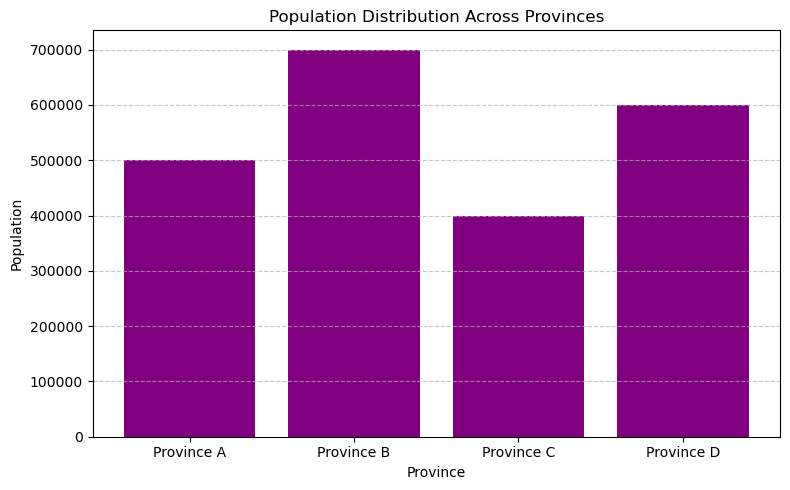

In [54]:
province_population_df = pd.DataFrame(province_population_data)
plt.figure(figsize=(8, 5))
plt.bar(province_population_df['Province'], province_population_df['Population'], color='purple')
plt.title('Population Distribution Across Provinces')
plt.xlabel('Province')
plt.ylabel('Population')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

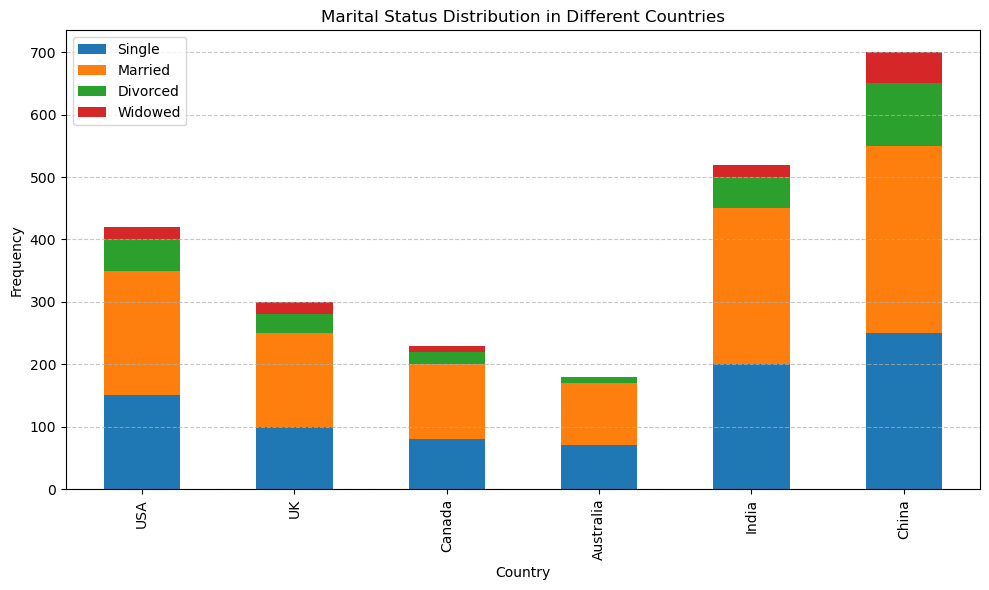

In [55]:
marital_status_df = pd.DataFrame(marital_status_data)
marital_status_df.set_index('Country', inplace=True)
marital_status_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Marital Status Distribution in Different Countries')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Extraction of top-10 countries with respect to total population

In [57]:
# Filter data for total population
total_population_data = world[world['Series Code'] == 'SP.POP.TOTL']

# Sort data based on the total population for 2022
total_population_sorted = total_population_data.sort_values(by="2022", ascending=False)

# Get the top ten countries with the highest total population for 2022
total_top_ten_countries = total_population_sorted.head(10)
print("Top ten countries of total population\n")
print(total_top_ten_countries[['Country Name']] )

Top ten countries of total population

           Country Name
89                India
41                China
206       United States
90            Indonesia
149            Pakistan
144             Nigeria
26               Brazil
15           Bangladesh
161  Russian Federation
127              Mexico


In [70]:
cols = ['2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022']

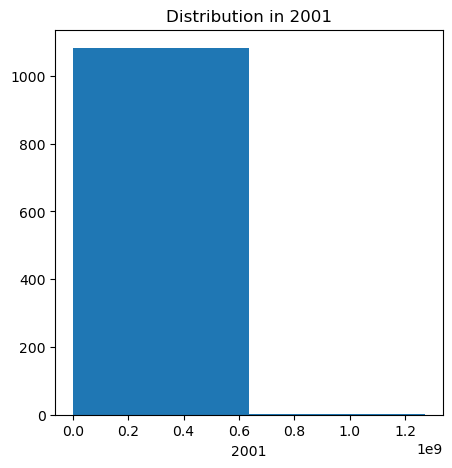

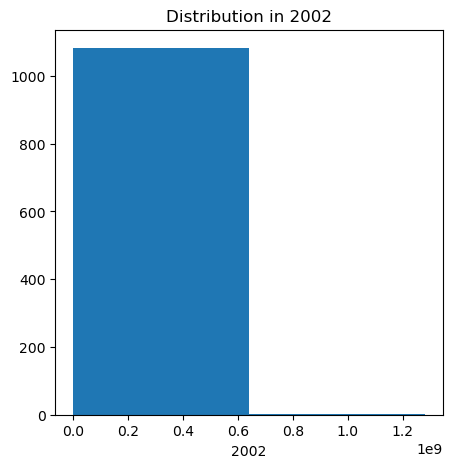

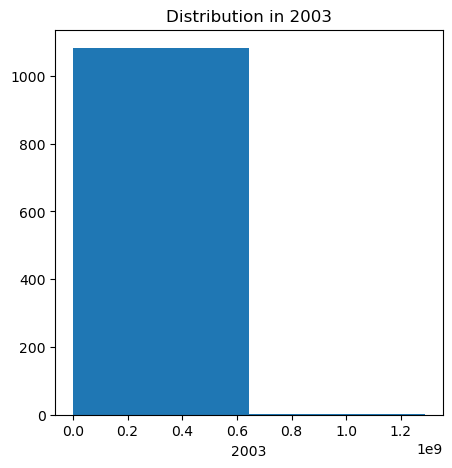

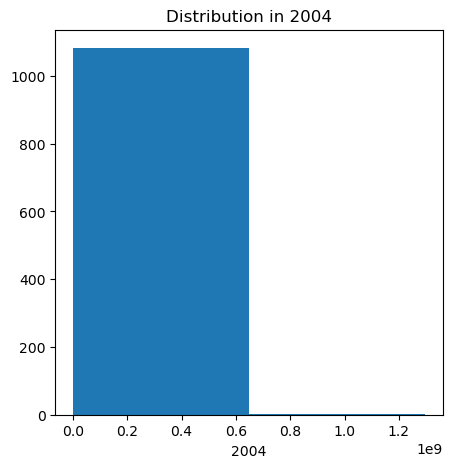

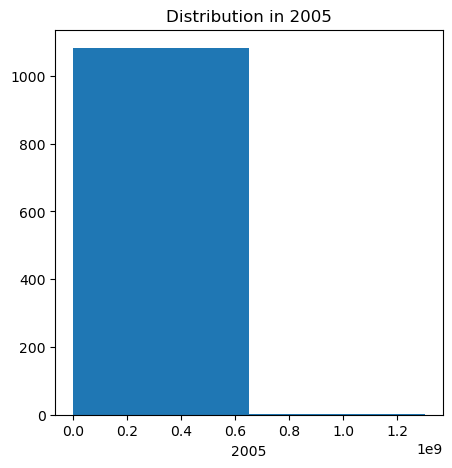

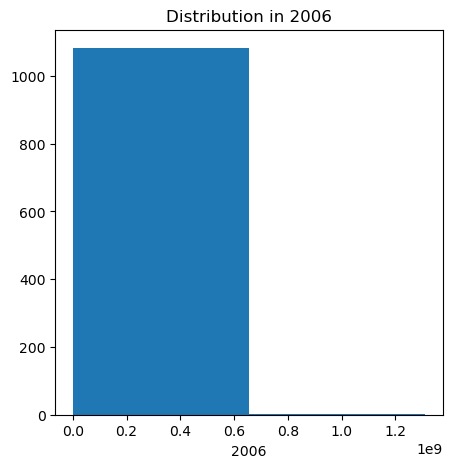

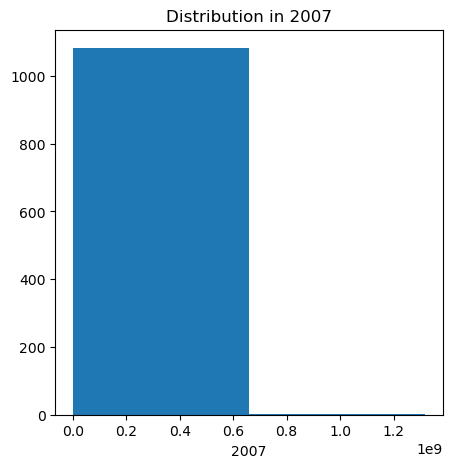

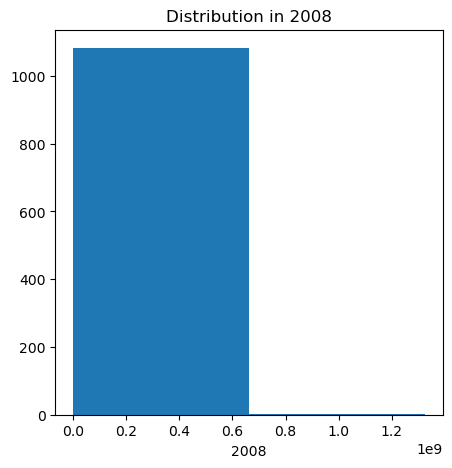

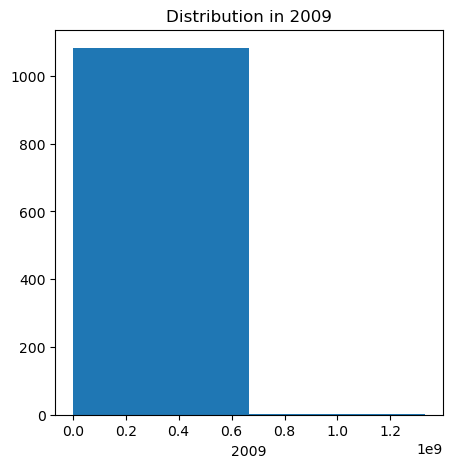

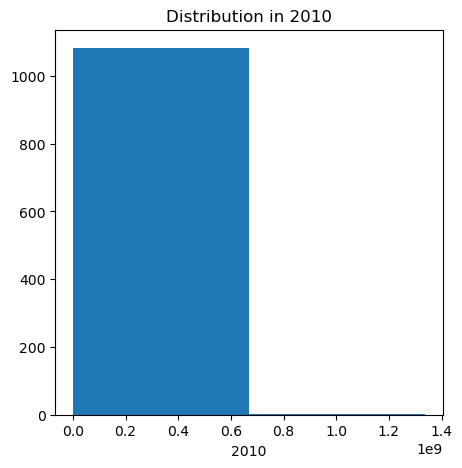

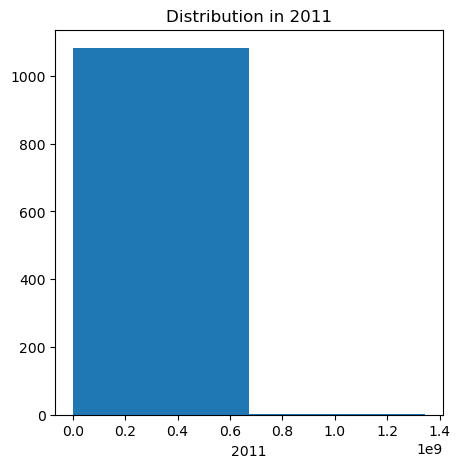

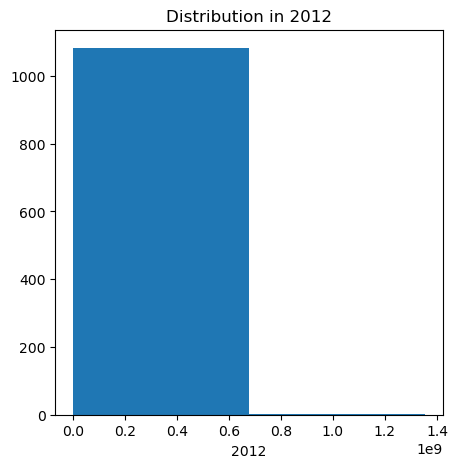

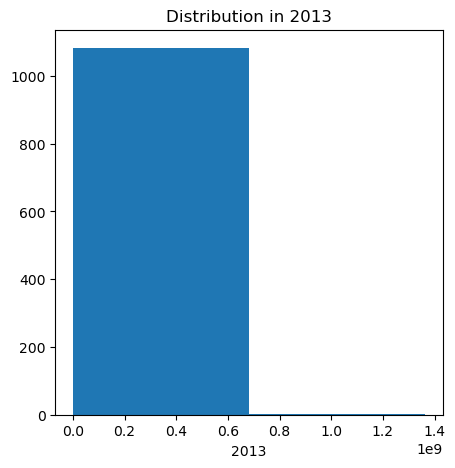

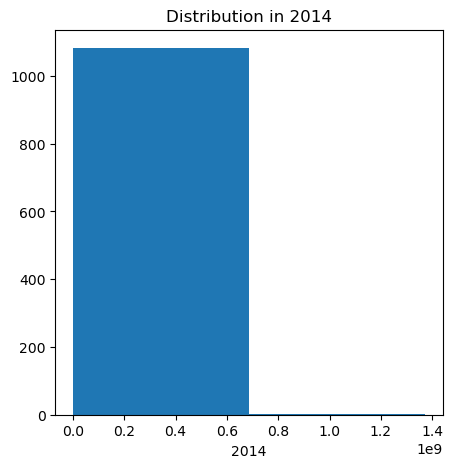

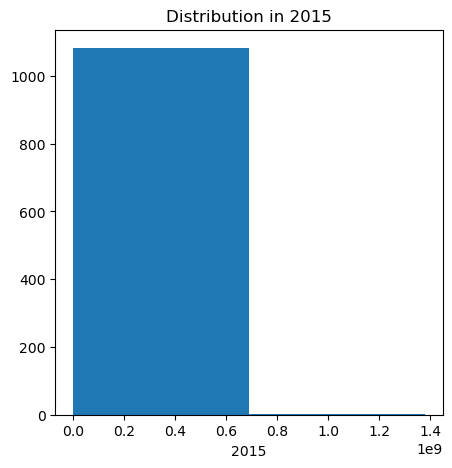

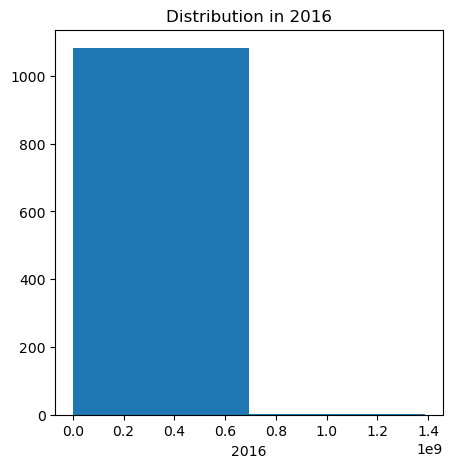

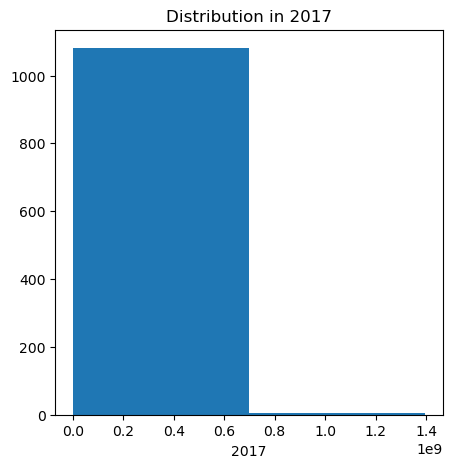

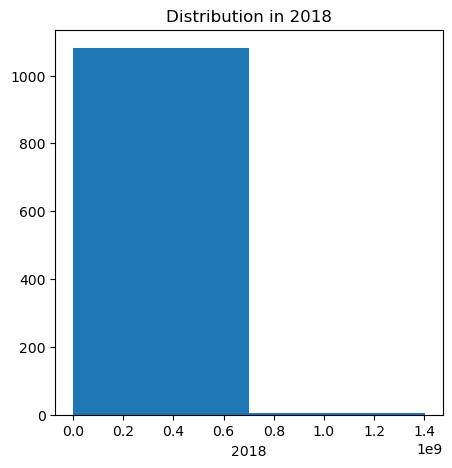

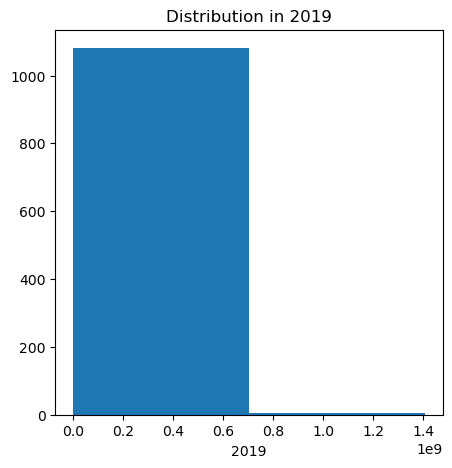

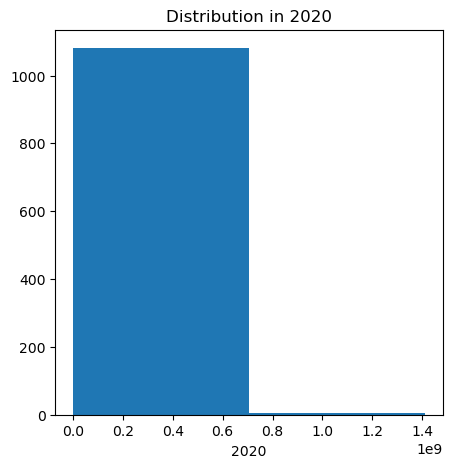

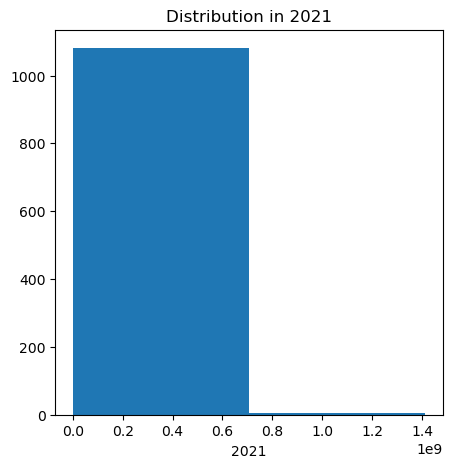

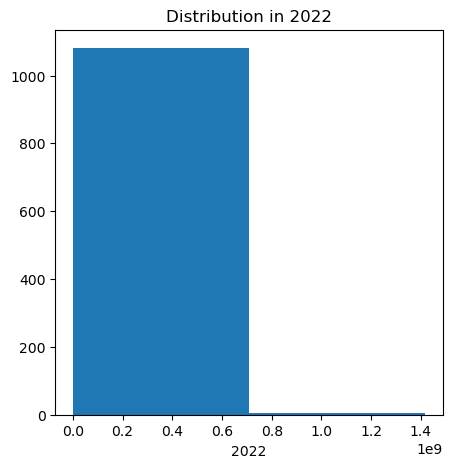

In [71]:
for i in cols:
        fig = plt.figure(figsize=(5,5))
        plt.hist(world[i], bins=2)
        plt.xlabel(i)
        plt.title(f"Distribution in {i}")
        plt.show()

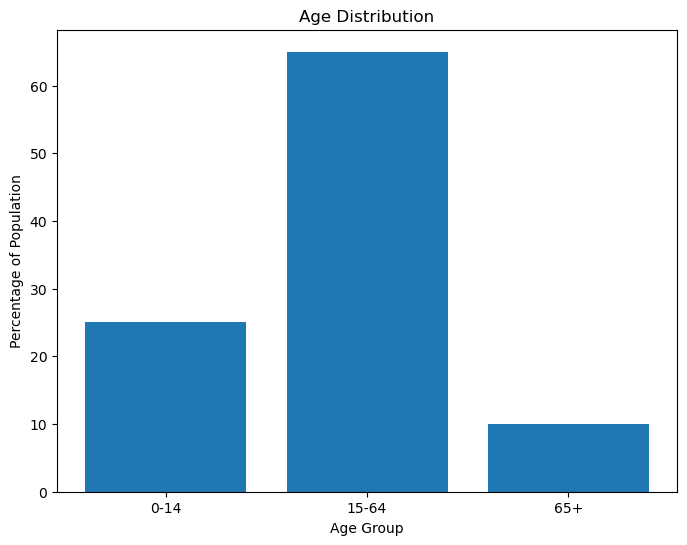

In [72]:
import matplotlib.pyplot as plt

age_groups = ['0-14', '15-64', '65+']
percentages = [25, 65, 10]

plt.figure(figsize=(8,6))
plt.bar(age_groups, percentages)
plt.xlabel('Age Group')
plt.ylabel('Percentage of Population')
plt.title('Age Distribution')
plt.show()